In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
train = pd.read_csv('/content/gdrive/MyDrive/ESAA/data/movies/movies_train.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# multinomial - 회귀 (다중공선성, 스케일링 방법2가지)

In [ ]:
train1 = train.copy()

train1['dir_prev_bfnum'].fillna(0, inplace=True)

# 년도,월 col 만들고 드랍
train1['release_time']=pd.to_datetime(train1['release_time'])

train1['release_year']=train1['release_time'].dt.year
train1['release_month']=train1['release_time'].dt.month
train1 = train1.drop(['release_time'],axis=1)

# title, director 드랍
train1 = train1.drop(['title','director'],axis=1)

# 장르 원핫인코딩
train1 = pd.get_dummies(train1, columns = ['genre'])

#배급사 전처리
distributor_list = train1.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train1['distributor'] = train1['distributor'].apply(lambda x : func(x))

# 배급사 원핫인코딩
train1 = pd.get_dummies(train1, columns = ['distributor'])

# 관람등급 원핫인코딩
train1 = pd.get_dummies(train1, columns = ["screening_rat"])

# 개봉연도, 월 원핫인코딩
train1 = pd.get_dummies(train1, columns = ["release_year"])
train1 = pd.get_dummies(train1, columns = ["release_month"])

In [ ]:
train2 = train.copy()

train2['dir_prev_bfnum'].fillna(0, inplace=True)

# 년도,월 col 만들고 드랍
train2['release_time']=pd.to_datetime(train2['release_time'])

train2['release_year']=train2['release_time'].dt.year
train2['release_month']=train2['release_time'].dt.month
train2 = train2.drop(['release_time'],axis=1)

# title, director 드랍
train2 = train2.drop(['title','director'],axis=1)

# 장르 원핫인코딩
train2 = pd.get_dummies(train2, columns = ['genre'],drop_first=True)

#배급사 전처리
distributor_list = train2.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train2['distributor'] = train2['distributor'].apply(lambda x : func(x))

# 배급사 원핫인코딩
train2 = pd.get_dummies(train2, columns = ['distributor'], drop_first=True)

# 관람등급 원핫인코딩
train2 = pd.get_dummies(train2, columns = ["screening_rat"], drop_first=True)

# 개봉연도, 월 원핫인코딩
train2 = pd.get_dummies(train2, columns = ["release_year"], drop_first=True)
train2 = pd.get_dummies(train2, columns = ["release_month"], drop_first=True)

In [ ]:
train2.columns

Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마',
       'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션',
       'genre_액션', 'genre_코미디', 'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스',
       'distributor_CJ 엔터테인먼트', 'distributor_기타', 'distributor_롯데엔터테인먼트',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'release_year_2011', 'release_year_2012',
       'release_year_2013', 'release_year_2014', 'release_year_2015',
       'release_month_2', 'release_month_3', 'release_month_4',
       'release_month_5', 'release_month_6', 'release_month_7',
       'release_month_8', 'release_month_9', 'release_month_10',
       'release_month_11', 'release_month_12'],
      dtype='object')

In [ ]:
train1.columns

Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num', 'genre_SF', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리',
       'genre_드라마', 'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스',
       'genre_애니메이션', 'genre_액션', 'genre_코미디', 'distributor_(주)NEW',
       'distributor_(주)마운틴픽쳐스', 'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트',
       'distributor_기타', 'distributor_롯데엔터테인먼트', 'screening_rat_12세 관람가',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'release_year_2010', 'release_year_2011',
       'release_year_2012', 'release_year_2013', 'release_year_2014',
       'release_year_2015', 'release_month_1', 'release_month_2',
       'release_month_3', 'release_month_4', 'release_month_5',
       'release_month_6', 'release_month_7', 'release_month_8',
       'release_month_9', 'release_month_10', 'release_month_11',
       'release_month_12'],
      dtype='object')

In [ ]:
test1 = pd.read_csv('/content/gdrive/MyDrive/ESAA/data/movies/movies_test.csv')

In [ ]:
test = test1.copy()

test['dir_prev_bfnum'].fillna(0, inplace=True)

# 년도,월 col 만들고 드랍
test['release_time']=pd.to_datetime(test['release_time'])

test['release_year']=test['release_time'].dt.year
test['release_month']=test['release_time'].dt.month
test = test.drop(['release_time'],axis=1)

# title, director 드랍
test = test.drop(['title','director'],axis=1)

# 장르 원핫인코딩
test = pd.get_dummies(test, columns = ['genre'])

#배급사 전처리
test['distributor'] = test['distributor'].apply(lambda x : func(x))

# 배급사 원핫인코딩
test = pd.get_dummies(test, columns = ['distributor'])

# 관람등급 원핫인코딩
test = pd.get_dummies(test, columns = ["screening_rat"])

# 개봉연도, 월 원핫인코딩
test = pd.get_dummies(test, columns = ["release_year"])
test = pd.get_dummies(test, columns = ["release_month"])

In [ ]:
test2 = test1.copy()

test2['dir_prev_bfnum'].fillna(0, inplace=True)

# 년도,월 col 만들고 드랍
test2['release_time']=pd.to_datetime(test2['release_time'])

test2['release_year']=test2['release_time'].dt.year
test2['release_month']=test2['release_time'].dt.month
test2 = test2.drop(['release_time'],axis=1)

# title, director 드랍
test2 = test2.drop(['title','director'],axis=1)

# 장르 원핫인코딩
test2 = pd.get_dummies(test2, columns = ['genre'],drop_first=True)

#배급사 전처리
test2['distributor'] = test2['distributor'].apply(lambda x : func(x))

# 배급사 원핫인코딩
test2 = pd.get_dummies(test2, columns = ['distributor'],drop_first=True)

# 관람등급 원핫인코딩
test2 = pd.get_dummies(test2, columns = ["screening_rat"], drop_first=True)

# 개봉연도, 월 원핫인코딩
test2 = pd.get_dummies(test2, columns = ["release_year"], drop_first=True)
test2 = pd.get_dummies(test2, columns = ["release_month"], drop_first=True)

In [ ]:
X1 =  train1.drop(["box_off_num"], axis=1 )
Y1 = train1["box_off_num"]

In [ ]:
X2 = train2.drop(["box_off_num"],axis=1)
Y2 = train2["box_off_num"]

In [ ]:
from sklearn.linear_model import LinearRegression

#선형 회귀 OLS로 학습/예측/평가 수행
lr1 = LinearRegression()
lr1.fit(X1, Y1)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression

#선형 회귀 OLS로 학습/예측/평가 수행
lr2 = LinearRegression()
lr2.fit(X2, Y2)

LinearRegression()

In [ ]:
pred1 = lr1.predict(test)

In [ ]:
pred2 = lr2.predict(test2)

In [ ]:
smpl_sub = pd.read_csv('/content/gdrive/MyDrive/ESAA/data/movies/submission.csv')

In [ ]:
smpl_sub["box_off_num"]= pred1
smpl_sub.to_csv('submission1.csv', index=False)

In [ ]:
smpl_sub["box_off_num"]= pred2
smpl_sub.to_csv('submission2.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X1)
X1_scaled = std.transform(X1)
test1_scaled = std.transform(test)

lr3 = LinearRegression()
lr3.fit(X1_scaled, Y1)

LinearRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X2)
X2_scaled = std.transform(X2)
test2_scaled = std.transform(test2)

lr4 = LinearRegression()
lr4.fit(X2_scaled, Y2)

LinearRegression()

In [ ]:
pred3 = lr3.predict(test1_scaled)

In [ ]:
pred4 = lr4.predict(test2_scaled)

In [ ]:
smpl_sub["box_off_num"]= pred3
smpl_sub.to_csv('submission3.csv', index=False)

In [ ]:
smpl_sub["box_off_num"]= pred4
smpl_sub.to_csv('submission4.csv', index=False)

In [ ]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X1_rb = rbs.fit_transform(X1)
test1_rb = rbs.transform(test)
lr5 = LinearRegression()
lr5.fit(X1_rb, Y1)

LinearRegression()

In [ ]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X2_rb = rbs.fit_transform(X2)
test2_rb = rbs.transform(test2)
lr6 = LinearRegression()
lr6.fit(X2_rb, Y2)

LinearRegression()

In [ ]:
pred5 = lr5.predict(test1_rb)
smpl_sub["box_off_num"]= pred5
smpl_sub.to_csv('submission5.csv', index=False)

In [ ]:
pred6 = lr6.predict(test2_rb)
smpl_sub["box_off_num"]= pred6
smpl_sub.to_csv('submission6.csv', index=False)

In [ ]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
X1_rb = rbs.fit_transform(X1)
test1_rb = rbs.transform(test)

In [ ]:
X1.columns

Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'genre_SF', 'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마',
       'genre_멜로/로맨스', 'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션',
       'genre_액션', 'genre_코미디', 'distributor_(주)NEW', 'distributor_(주)마운틴픽쳐스',
       'distributor_(주)쇼박스', 'distributor_CJ 엔터테인먼트', 'distributor_기타',
       'distributor_롯데엔터테인먼트', 'screening_rat_12세 관람가',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'release_year_2010', 'release_year_2011',
       'release_year_2012', 'release_year_2013', 'release_year_2014',
       'release_year_2015', 'release_month_1', 'release_month_2',
       'release_month_3', 'release_month_4', 'release_month_5',
       'release_month_6', 'release_month_7', 'release_month_8',
       'release_month_9', 'release_month_10', 'release_month_11',
       'release_month_12'],
      dtype='object')

> 점수 : 1997396.5481417729

In [ ]:
import pandas as pd
train = pd.read_csv('/content/gdrive/MyDrive/ESAA/data/movies/movies_train.csv')

train1 = train.copy()

train1['dir_prev_bfnum'].fillna(0, inplace=True)

# 년도,월 col 만들고 드랍
train1['release_time']=pd.to_datetime(train1['release_time'])

train1['release_year']=train1['release_time'].dt.year
train1['release_month']=train1['release_time'].dt.month
train1 = train1.drop(['release_time'],axis=1)

# title, director 드랍
train1 = train1.drop(['title','director'],axis=1)

#배급사 전처리
distributor_list = train1.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train1['distributor'] = train1['distributor'].apply(lambda x : func(x))


#원핫인코딩

train1 = pd.get_dummies(train1)

In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/ESAA/data/movies/movies_test.csv')

test['dir_prev_bfnum'].fillna(0, inplace=True)

# 년도,월 col 만들고 드랍
test['release_time']=pd.to_datetime(test['release_time'])

test['release_year']=test['release_time'].dt.year
test['release_month']=test['release_time'].dt.month
test = test.drop(['release_time'],axis=1)

# title, director 드랍
test = test.drop(['title','director'],axis=1)

#배급사 전처리
test['distributor'] = test['distributor'].apply(lambda x : func(x))

test = pd.get_dummies(test)

# 랜덤 포레스트

In [ ]:
# 랜덤포레스트 회귀: 그리드 서치
train_x = train1.drop(['box_off_num'],axis= 1)
train_y = train1['box_off_num']

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


X_train = train_x
y_train = train_y


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_


print("Best Hyperparameters:", grid_search.best_params_)


y_pred = best_rf_model.predict(test)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


> 점수 : 1345037.20807

In [ ]:
#랜덤포레스트 회귀: 특성 중요도 하위 10위권 drop

import numpy as np

feature_importances = best_rf_model.feature_importances_
feature_names = train_x.columns

sorted_idx = np.argsort(feature_importances)

# 하위 10위권
least_important_features = feature_names[sorted_idx][:10]


train_x_filtered = train_x.drop(least_important_features, axis=1)

test_filtered = test.drop(least_important_features, axis=1)

# 특성 drop 열 확인
print(f"Dropped features: {least_important_features}")


# 기존 베스트 파라미터 사용
best_max_depth = None
best_min_samples_leaf = 4
best_min_samples_split = 10
best_n_estimators = 100

rf_regressor = RandomForestRegressor(
    max_depth=best_max_depth,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split,
    n_estimators=best_n_estimators,
    random_state=42
)


rf_regressor.fit(train_x_filtered, train_y)

y_pred = rf_regressor.predict(test_filtered)


Dropped features: Index(['genre_서스펜스', 'genre_뮤지컬', 'genre_다큐멘터리', 'genre_애니메이션',
       'distributor_(주)마운틴픽쳐스', 'screening_rat_전체 관람가', 'genre_미스터리',
       'genre_멜로/로맨스', 'genre_공포', 'genre_SF'],
      dtype='object')


> 점수 : 1346844.50188

# XGBoost

In [ ]:
#XGBoost 그리드 서치

train_x = train1.drop('box_off_num', axis = 1)
train_y = train1['box_off_num']
test_x = test

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=156)

params = {'min_child_weight':[0.3,0.5,0.7],
          'gamma': [0,0.05,0.1],
          'max_depth':[5,6,7],
          'subsample':[0.5,0.6,0.7],
          'n_estimators': [100,300]
}

gridcv = GridSearchCV(xgb, param_grid=params, scoring='neg_mean_squared_error', cv=3, verbose=1)
gridcv.fit(train_x, train_y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
GridSearchCV 최적 파라미터: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 0.3, 'n_estimators': 300, 'subsample': 0.7}


In [ ]:
from sklearn.metrics import mean_squared_error

xgb= XGBRegressor(max_depth=5, min_child_weight=0.3, n_estimators=300, subsample=0.7)

xgb.fit(train_x, train_y)
y_pred = xgb.predict(test_x)

> 점수 : 1244365.5311266673

Fitting 3 folds for each of 162 candidates, totalling 486 fits
GridSearchCV 최적 파라미터: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 0.3, 'n_estimators': 300, 'subsample': 0.7}


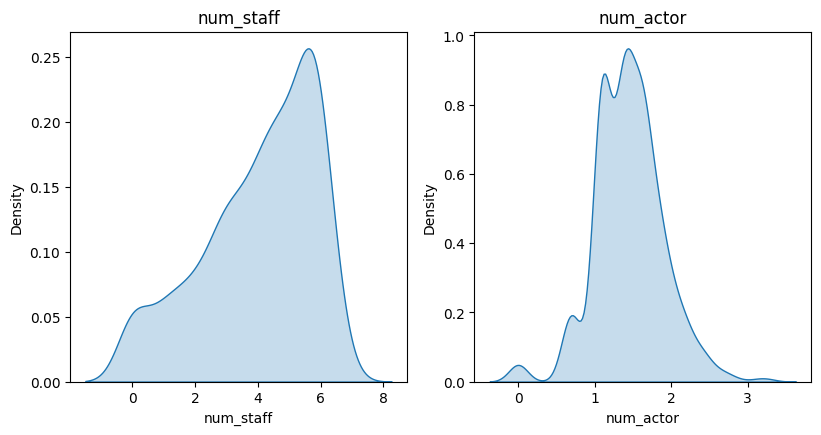

In [ ]:
# XGBoost 로그 변환
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

list = ["num_staff", "num_actor"]

for i in range(2):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(train1[list[i]], fill = True)
  plt.title(f"{list[i]}")
  plt.xlabel(f"{list[i]}")

train1["num_staff"] = np.log1p(train1["num_staff"])
test["num_staff"] = np.log1p(test["num_staff"])
train1["num_actor"] = np.log1p(train1["num_actor"])
test["num_actor"] = np.log1p(test["num_actor"])

train_x = train1.drop('box_off_num', axis = 1)
train_y = train1['box_off_num']
test_x = test

params = {'min_child_weight':[0.3,0.5,0.7],
          'gamma': [0,0.05,0.1],
          'max_depth':[5,6,7],
          'subsample':[0.5,0.6,0.7],
          'n_estimators': [100,300]
}

gridcv = GridSearchCV(xgb, param_grid=params, scoring='neg_mean_squared_error', cv=3, verbose=1)
gridcv.fit(train_x, train_y)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb= XGBRegressor(gamma=0.1,max_depth=7, min_child_weight=0.3, n_estimators=300, subsample=0.7)


xgb.fit(train_x, train_y)
y_pred = xgb.predict(test_x)

> 점수 : 1285626.425888215

# lightGBM

In [ ]:
# lgbm 그리드 서치
xtrain=train1.drop(['box_off_num'],axis=1)
ytrain=train1['box_off_num']

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

params = {
    'num_leaves': [40, 50, 70, 90],
    'min_child_samples': [10,30,50, 70, 100],
    'subsample': [0.8, 1],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 90,100, 150],
}

lgbm=LGBMRegressor()


gridcv=GridSearchCV(lgbm,param_grid=params,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
gridcv.fit(xtrain,ytrain)
print('GridSearch 최적 파라미터',gridcv.best_params_)

test1 = test.copy()




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 20
[LightGBM] [Info] Start training from score 708181.751667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [ ]:
#최적파라미터로 모델 fit 하기

lgbm_wrapper = LGBMRegressor(min_child_samples=30, num_leaves=40, subsample=0.8,n_estimators=50,learning_rate=0.05)


lgbm_wrapper.fit(xtrain, ytrain)
lgbmpred = lgbm_wrapper.predict(test1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 20
[LightGBM] [Info] Start training from score 708181.751667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

> 점수 : 1403331.5264729692

In [ ]:
# lgbm 로그변환

train2=train1.copy()
test2=test1.copy()

import numpy as np
train2['dir_prev_bfnum'] = np.log1p(train2['dir_prev_bfnum'])
train2['num_actor'] = np.log1p(train2['num_actor'])
train2['num_staff'] = np.log1p(train2['num_staff'])
train2['box_off_num'] = np.log1p(train2['box_off_num'])

test2['dir_prev_bfnum'] = np.log1p(test2['dir_prev_bfnum'])
test2['num_actor'] = np.log1p(test2['num_actor'])
test2['num_staff'] = np.log1p(test2['num_staff'])

xtrain=train2.drop(['box_off_num'],axis=1)
ytrain=train2['box_off_num']

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

params = {
    'num_leaves': [40, 50, 70, 90],
    'min_child_samples': [30,50, 70, 100],
    'subsample': [0.8, 1],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 90,100, 150],
}

lgbm=LGBMRegressor()


gridcv=GridSearchCV(lgbm,param_grid=params,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
gridcv.fit(xtrain,ytrain)
print('GridSearch 최적 파라미터',gridcv.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 18
[LightGBM] [Info] Start training from score 9.951971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
#최적파라미터로 모델 fit 하기

lgbm_wrapper = LGBMRegressor(min_child_samples=50, num_leaves=40, subsample=0.8,n_estimators=50,learning_rate=0.2)


lgbm_wrapper.fit(xtrain, ytrain)
lgbmpred = lgbm_wrapper.predict(test2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 18
[LightGBM] [Info] Start training from score 9.951971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

> 점수 : 1987082.302123137